## Chapter 2 : End-to-End Machine Learning Project

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

### Get the Data

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH) :
    if not os.path.isdir(housing_path) :
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH) :
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#### Take a Quick Look at the Data Structure

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()
#To get a quick description of the data, in particular the total number of rows, each attribute's type and the number of nonnull values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<li> Notice that the column "total_bedroom" is less than the others. We have to take care of this!
<li> All datatype are numerical type, except "ocean_proximity"

In [8]:
housing["ocean_proximity"].value_counts()
#To find out what categories exist and how many belong to each category

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe() 
# This one shows the summary of the numerical types

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now we use histogram to look at the data in the column more closely, we will use hist() to do this

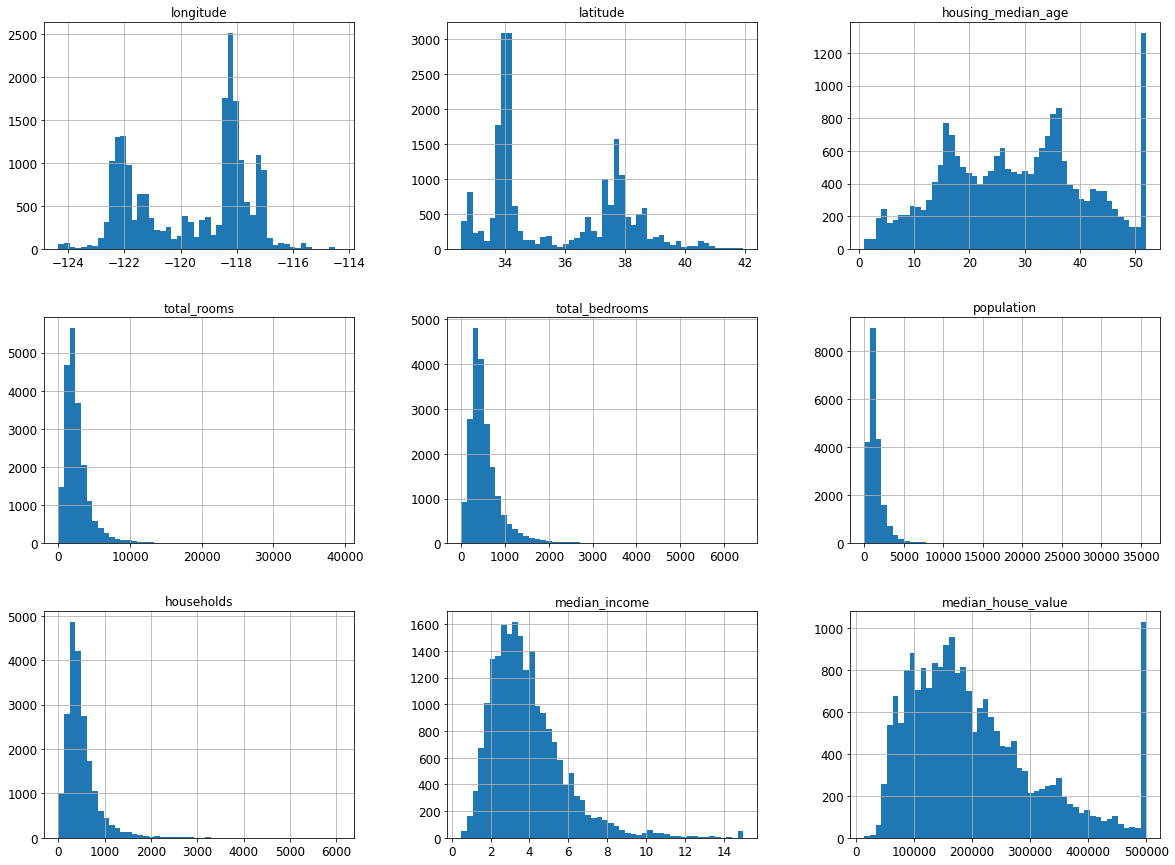

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20,15))
plt.show()

Remarks : <br>
<li> The "median_income" does not express in USD. The data has been scaled and capped at 15 for higher median income and at 0.5 for lower median income. The number of the x axis represents tens of thousand dollars (e.g. 3 means $30,000).
<li> The "housing_median_age" and "median_house_value" are also capped. Might be problematic for the latter, because it is the <b> TARGET ATTRIBUTE</b>.
<li> Many histograms are tail-heavy: they extend much farther to the right of the median than to the left.

#### Create a Test Set

In [11]:
#To make this notebook's output identical at every run
np.random.seed(42)

In [12]:
import numpy as np

#sklearn also has split_train_test, but this is to visualize it (and to understand them!)
def split_train_test(data, test_ratio) :
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2) #We choose 20% as the test set
print(f"len(train_set) : {len(train_set)}")
print(f"len(test_set) : {len(test_set)}")

len(train_set) : 16512
len(test_set) : 4128


To make sure that the dataset it consistent when the dataset is updated, we use each instance's identifier to decide whether it should go in the test set or not. 

In [14]:
# Here is a possible implementation
from zlib import crc32

def test_set_check(identifier, test_ratio) :
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id (data, test_ratio, id_column) :
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
# Since the housing dataset doesn't have an identifier column, we use the row index as the ID
housing_with_id = housing.reset_index() #Adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# Make sure that the new data gets appended to the end of the dataset and that no row EVER gets deleted

In [16]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [17]:
# If this is not possible, try using the most STABLE features to BUILD a unique identifier. Example here, with latitude and longitude
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set2, test_set2 = split_train_test_by_id(housing_with_id, 0.2, "id")

In [18]:
test_set2.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [19]:
# We can also use the predefined function from sklearn
from sklearn.model_selection import train_test_split

train_set3, test_set3 = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
test_set3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


Let's say that the "median_income" is very important. So we have to ensure that the set test is represantative of the various categories of incomes in the whole dataset. <br>
Since it is a continuous numerical attribute, we need to create an income category attribute. How? By looking at the <b> HISTOGRAM </b> <br>
It is important to have a sufficient number of instances in your dataset for each stratum, else it might be biased. <br>
We use pd.cut() to create an income category attribute with five categories (labeled from 1 to 5)

<AxesSubplot:>

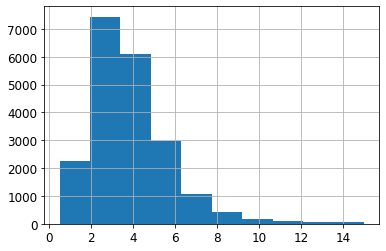

In [21]:
housing["median_income"].hist()

In [23]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

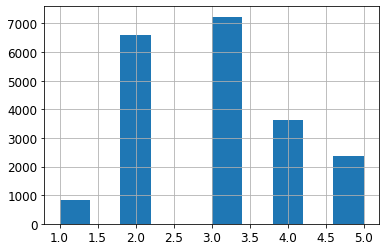

In [24]:
housing["income_cat"].hist()

In [25]:
# Now we can figure out the number of occurences for each category
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [31]:
# Now we can do stratified sampling based on the income category. We use StratifiedShuffleSplit class from sklearn
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [33]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)
# This is to check that the test set generated by stratified sampling is almost identical to those in the full dataset. (See code below!)
# Whereas the test set is generated using purely random sampling 

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [34]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [37]:
# Now we should remoce the "income_cat" attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

### Discover and Visualize the Data to Gain Insights 

If the training is very large, we want to sample an exploration set, to make manipulations easy and fast.
But in our case it is quite small, so we can just copy it without harmoing them

In [41]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

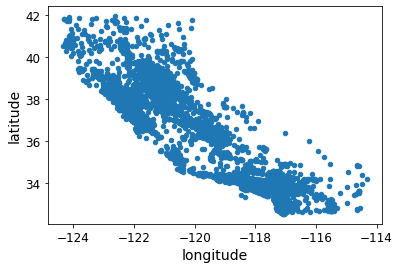

In [39]:
# Since there is a geographical info, it is good to create a scatterplot of all district to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

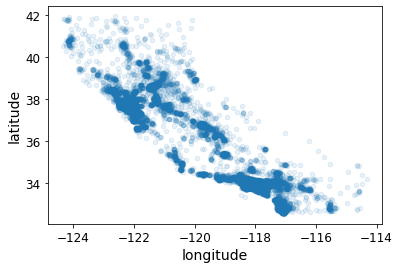

In [40]:
# Setting the "alpha" option to 0.1 makes it easier to visualize the places where there is a high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

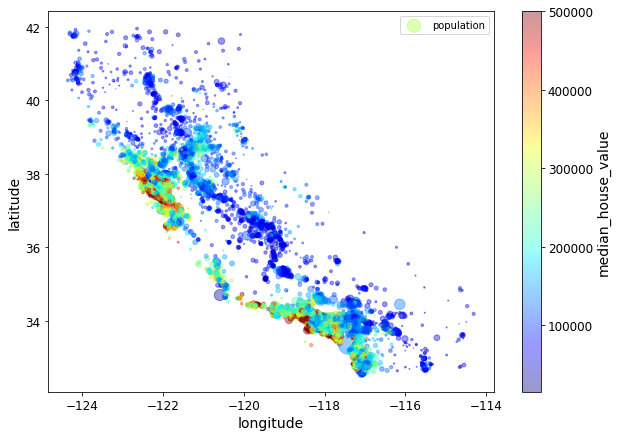

In [43]:
# Now, let's look at the housing prices.
# The radius of each circle represents the district's population (option s)
# The color represents the price (option c)
# We use a predefined color map (option cmap) called jet, which ranges from blue (lowest price) to red (high price)
# sharex fixes a display bug (the x-axis values and legend were not displayed)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label = "population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

plt.legend()

In [46]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1e64cf34550>)

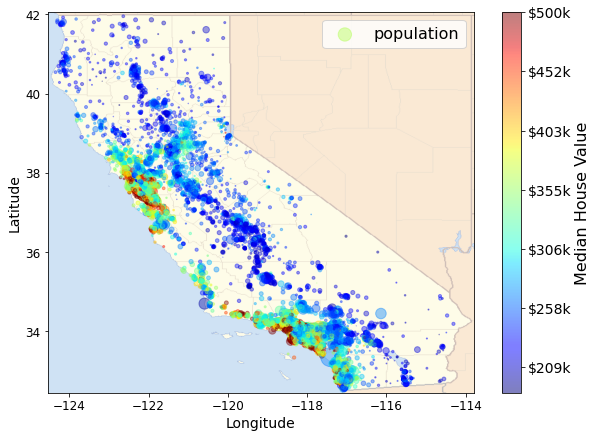

In [60]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label = "population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False) #Same picture as above, but without the color bar
# Now we combine the california map with the picture above
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Now create the colorbar with the price
prices = housing["median_house_value"] # Only printing the index with the price
tick_values = np.linspace(prices.min(), prices.max(), 11) # Returns 11 evenly spaced samples, calculated over the interval [prices.min(), prices.max()]. Here the lowest is 14999.0 and highest is 500001.0.
cbar = plt.colorbar(ticks=tick_values/prices.max()) # This is creating the colorbar
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()

##### Looking for correlations

We can count the <i> standard correlation coefficient </i> between every pair of attributes using the corr() method

#### 

In [62]:
corr_matrix = housing.corr()
print(corr_matrix)
# This output nxn matrix (n is the number of attributes)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [63]:
# Now let's look at how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

If it is close to 1, it means that there is a strong positive correlation. <br>
If it is close to -1, it means that there is a strong negative correlation. <br>
If it is close 0, then there is no linear correlation.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

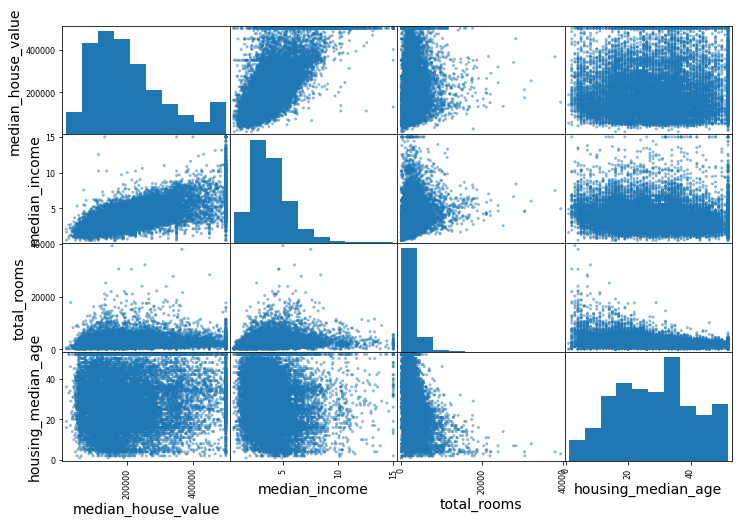

In [64]:
# Another way to check for correlation is by using the pandas scatter_matrix() function
# We will get n^2 plots, so we need to trim them!

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

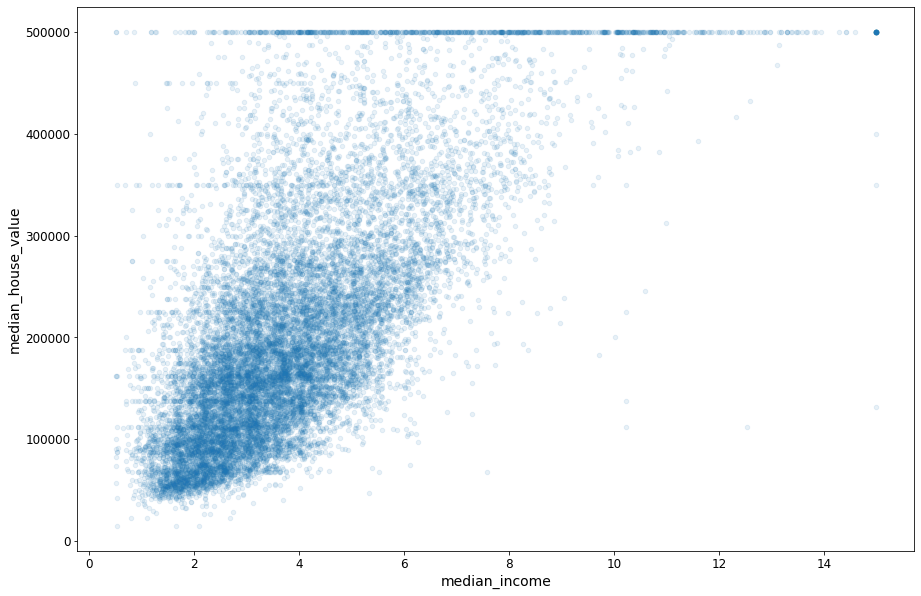

In [68]:
# After seeing the graph. we can see that the "median_income" is very important to predict the "median_house_value" 
# So we're gonna zoom in to that

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(15,10))

A few remarks from the graph : <br>
<li> The correlation is very strong. The points are not too dispersed </li>
<li> The price cap is at $500,000 </li>
<li> It also reveals less abovious horizontal lines, like at $450,000;  $350,000; perhaps $280,000; and a few below that <br>
    We need to try to remove the corresponding districts to prevent the algorithm from learning to reproduce data quircks. </li>

##### Experimenting with Attribute Combinations

One last step before training is to try out various atribute combinations. <br>
For example : the column "total_rooms" is not very useful if we don't know how many households there are. <br>
What we really want is number of rooms <b> PER </b> household. 
Similar is the column "total_bedrooms". We want to compare it to the number of rooms. <br><br>
What we want is to create <b> NEW ATTRIBUTES </b>

In [71]:
# For example :
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [75]:
# Now we look at the correlation matrix again
corr_matrix2 = housing.corr()
corr_matrix2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [76]:
corr_matrix2["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

What we get : <br>
<li> The new atribute "bedrooms_per_room" is more correlated with the median house value than the total number of bedrooms or the number of rooms. We can say that houses with <it> lower </it> bedroom/room ratio tend to be more expensive </li>
<li> Analogous for the attribute "rooms_per_household". The <it> larger </it> the house, the more expensive they are. </li>

### Prepare the Data for ML Algorithms

In [87]:
# Now we have to separate the predictors and the labels
housing = strat_train_set.drop("median_house_value", axis=1) # Removing the column median_house_value from the dataset
housing_labels = strat_train_set["median_house_value"].copy() # And have it here :)
print(housing.head()) 
print("\n")
print(housing_labels.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  


17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


#### Data Cleaning

As we mentioned earlier, the attribute "total_bedrooms" has missing values, we have three options : <br>
<li> Get rid of the corresponding districts. </li>
<li> Get rid of the whole attribute. </li>
<li> Set the values to some value (zero, the mean, the median, etc.). </li>
To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one NULL. 

In [104]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [106]:
# Option 1 : Get rid of the corresponding districts
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [107]:
# Option 2 : Get rid of the whole attribute.
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [105]:
# Option 3 : Set the values to some value.
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


sklearn also provides a function to fill in the value : <b> SimpleImputer </b>

In [108]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Since we can only count median on numerical attributes, we need to copy the dataset without the text attribute
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [109]:
# Now we can fit the "imputer" instance to the training data with the "fit()"" method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [110]:
# Since we don't know what would happen in the future when we add new data to the dataset,
# it is safer to apply imputer to ALL numerical attributes

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [111]:
housing_num.median().values #This is if we do it manually, and it is the same!

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [112]:
# We now transform the training set by replacing missing values with the learned medians
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [113]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [114]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [115]:
imputer.strategy

'median'

#### Handling Text and Categorical Attributes

In [116]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [117]:
# Since it is categorical attribute, we can convert these categories from text to numbers, with the help from sklearn "OridnalEncoder"

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [118]:
# categories_ is used to show all categories in the column
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The issue with this is, ML algorithms will assume that two nearby values are more similar than two distant values. Example : "bad", "average", "good", "excellent". <br>
But in this case, they should not have this "degree". So what we can do it create one <i> binary attribute per category </i>. This is called <b> one-hot encoding </b>. And the new attributes are called <b> dummy </b> attribute. Sklearn provides a OneHotEncoder for this purpose

In [119]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [120]:
# The result is a very sparse matrix (a matrix with a lot of 0s), but we can change it to a sparse matrix with toarray() method
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [121]:
# Alternatively one can set "sparse=False" when creating the OneHotEncoder :
# We will get the same result

cat_encoder2 = OneHotEncoder(sparse=False)
housing_cat_1hot2 = cat_encoder2.fit_transform(housing_cat)
housing_cat_1hot2

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### Custom Transfers

Now we can create custom transformer to add extra attributes

In [126]:
# How to get the indices of the columns :
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names]
print(rooms_ix, bedrooms_ix, population_ix, households_ix)

3 4 5 6


In [127]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # This is hard-coded, should be dynamic! (Like above)
class CombinedAttributeAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room= add_bedrooms_per_room
    def fit(self, X, y=None) :
        return self # Nothing else to do
    def transform(self, X) :
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [128]:
# The variable housing_extra_attribs is a NumPy array. We've lost the column names. To recover a DataFrame, you could run :
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                     columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
                                     index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


#### Transformation Pipeline

There are many data transformation steps that need to be executed in the right order. Fortunately, sklearn provides the "Pipeline" class

In [130]:
# Now let's build a pipeline for preprocessing the numerical attribute
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
 
num_pipeline = Pipeline([('imputer,', SimpleImputer(strategy="median")), 
                         ('attribs_adder', CombinedAttributeAdder()),
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [131]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

So far, we treat numerical and categorical separately. But with sklearn's "ColumnTransfer", we can handle all columns.

In [136]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # List of all columns in housing_num (which is all numerical)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [138]:
housing_prepared.shape

(16512, 16)

### Select and Train a Model

#### Training and Evaluating on the Training Set

In [141]:
# First, let's try Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [148]:
# Let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

#Compare it with the actual value
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


It works, but it is off by 40%! Let's measure its RMSE with "mean_square_error()" function

In [149]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

The "median_housing_values" ranges between $120,000 tio $265,000, so a prediction error of $68,628 is <b> NOT </b> very satisfying. This is called <i> underfitting </i>. So let's try a another more powerful model

In [150]:
# Let's use DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [162]:
housing_prediction_tree_reg = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction_tree_reg)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

0.0 is VERY unlikely to be true. It is called <i> overfitting </i>. Usually in this case, we might touch the test set, so that it already knew what to expect. Or we included attributes that should not be included in the model.

#### Better Evaluation Using Cross-Validation

Alternative : Use sklearn's <i> K-fold cross validation </i> <br>
This randomly splits the training set into 10 folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training the other 9 folds. <br>
The result is an array containing 10 evaluations scores.

In [153]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

[67669.73816437 67362.61970456 70229.34328631 68299.62160307
 71291.36213287 75577.59634532 72668.53981039 70226.23940832
 77010.86953522 69438.29976359]


In [154]:
def display_scores(scores) :
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard deviation : ", scores.std())

display_scores(tree_rmse_scores)

Scores :  [67669.73816437 67362.61970456 70229.34328631 68299.62160307
 71291.36213287 75577.59634532 72668.53981039 70226.23940832
 77010.86953522 69438.29976359]
Mean :  70977.42297540254
Standard deviation :  3085.3445235048844


It doesn't look good. And even it is worse than Linear Regression! <br>
Advantage : An estimate performance of the model and also how precise the estimate is (i.e., its standard deviation) <br>
Disadvantage : Training time is costly

In [155]:
# Let's compute the same scores for the Linear Regression model just to be sure

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean :  69052.46136345083
Standard deviation :  2731.6740017983498


Decision Tree performs worse, so let's try other models. 

In [156]:
# Let's try RandomForestRegressor
# RandomForestRegressor works by training many Decision Trees on random subsets of the features, then averaging their prediction

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [157]:
housing_prediction_random_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_prediction_random_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18647.2140339276

In [159]:
# With k-fold cross validation
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores :  [49507.80266505 47517.95674814 49579.62227697 52247.75798577
 49537.81159503 53130.51206156 48727.8045956  47770.63859984
 53056.62949045 49867.1716518 ]
Mean :  50094.370767020824
Standard deviation :  1936.640296939248


Random forest works better. Score in the training set is still much lower than on the validation sets, means that it is still overfitting. <br>
Possible solution : Simplify the model, contrain it or get more training data

In [160]:
# So let's try another model, Support Vector Machine (SVM)
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

SVR(kernel='linear')

In [161]:
housing_prediction_svm = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_prediction_svm)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

Help! It's getting worse!

In [163]:
# With k-fold cross validation
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores :  [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean :  111809.84009600841
Standard deviation :  2762.393664321567


### Fine-Tune Your Model

#### Grid Search

We use "GridSearchCV" to search the great combination of hyperparameters. We tell which ones we want to experiment with and what values to try out. It will use <i> cross-validation </i> to evaluate all possible combinations. <br>
For example :

In [164]:
from sklearn.model_selection import GridSearchCV

param_grid = [ # Try 12 (3x4) combinations of hyperparameters
                {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
                # Then try 6 (2x3) combinations with bootstrap set as False
                {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}]

forest_reg2 = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg2, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

<li> First, it will evaluate all 3x4 = 12 combinations in the first element of the dictionary. </li>
<li> Then all 2x3 = 6 combinations with bootstap set to False in the second element of the dictionary. </li>
<li> The Grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor() hyperparameter values, and it will trin each model 5 times (because we set the cv to be 5).
<li> All in all, there will be 18x5 = 90 rounds of training!

In [165]:
# And to find out the best hyperparameter combination :
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [167]:
# And to find out the best estimator :
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [169]:
# We can take a look at each score of all combinations :
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]) :
    print(np.sqrt(-mean_score), params)

64864.514213106995 {'max_features': 2, 'n_estimators': 3}
55522.50733361778 {'max_features': 2, 'n_estimators': 10}
52953.17310293192 {'max_features': 2, 'n_estimators': 30}
60386.632857345096 {'max_features': 4, 'n_estimators': 3}
52745.53172884176 {'max_features': 4, 'n_estimators': 10}
50739.59393670911 {'max_features': 4, 'n_estimators': 30}
59996.027261817086 {'max_features': 6, 'n_estimators': 3}
51806.28332807205 {'max_features': 6, 'n_estimators': 10}
49928.36765427816 {'max_features': 6, 'n_estimators': 30}
58667.43590237021 {'max_features': 8, 'n_estimators': 3}
51947.71561949527 {'max_features': 8, 'n_estimators': 10}
50098.23384541103 {'max_features': 8, 'n_estimators': 30}
61628.60105830964 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54961.16038902368 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59621.300220817655 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52615.689033135655 {'bootstrap': False, 'max_features': 3, 'n_estimators

The RMSE score is slightly better, here is 49,682 (in comparison to k-cross Validation, it was 50,182). Hooray! <br>
We can also treat some of the data preparation steps as hyperparameters. For example, the grid search will automatically find out whether to add a feature we're not sure about or not.

In [178]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.217226,0.111552,0.009585,0.003064,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.115040e+09,-4.313849e+09,...,-4.207405e+09,7.768462e+07,18,-1.144507e+09,-1.077588e+09,-1.067845e+09,-1.207130e+09,-1.067214e+09,-1.112857e+09,5.521316e+07
1,0.311933,0.015132,0.015970,0.000760,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.749917e+09,-3.323940e+09,...,-3.082749e+09,2.299101e+08,11,-5.493856e+08,-6.010239e+08,-5.817648e+08,-5.826486e+08,-5.895974e+08,-5.808841e+08,1.719055e+07
2,0.895207,0.023130,0.037117,0.006666,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.660391e+09,-2.924326e+09,...,-2.804039e+09,1.455195e+08,9,-4.468460e+08,-4.307145e+08,-4.322877e+08,-4.428751e+08,-4.165051e+08,-4.338457e+08,1.061570e+07
3,0.141965,0.003732,0.005041,0.000682,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.472604e+09,-3.766374e+09,...,-3.646545e+09,2.770595e+08,16,-9.687840e+08,-9.949485e+08,-9.937471e+08,-9.405316e+08,-1.001692e+09,-9.799407e+08,2.265629e+07
4,0.511654,0.068732,0.014990,0.001853,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.565190e+09,-2.798914e+09,...,-2.782091e+09,1.548206e+08,8,-5.101572e+08,-5.037748e+08,-5.257224e+08,-5.385124e+08,-4.975754e+08,-5.151485e+08,1.497174e+07
5,2.058228,0.434083,0.064335,0.021115,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.375677e+09,-2.659899e+09,...,-2.574506e+09,1.571919e+08,3,-4.001546e+08,-3.860510e+08,-3.966830e+08,-3.933076e+08,-3.966277e+08,-3.945648e+08,4.776047e+06
6,0.381698,0.090443,0.013458,0.006563,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.485973e+09,-3.600506e+09,...,-3.599523e+09,8.990878e+07,15,-9.078449e+08,-9.307032e+08,-9.555154e+08,-9.833781e+08,-9.164047e+08,-9.387693e+08,2.753882e+07
7,1.290009,0.150971,0.022988,0.003738,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.616771e+09,-2.775960e+09,...,-2.683891e+09,1.144749e+08,4,-5.288915e+08,-5.117254e+08,-4.816925e+08,-4.842353e+08,-4.981988e+08,-5.009487e+08,1.763313e+07
8,4.432071,0.465337,0.107739,0.091599,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.372543e+09,-2.520009e+09,...,-2.492842e+09,1.302710e+08,1,-3.985452e+08,-3.853134e+08,-3.844256e+08,-3.864522e+08,-3.790826e+08,-3.867638e+08,6.410452e+06
9,0.320370,0.030166,0.006202,0.001475,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.311458e+09,-3.407002e+09,...,-3.441868e+09,1.322990e+08,12,-9.694599e+08,-8.690774e+08,-8.657362e+08,-9.028669e+08,-8.448450e+08,-8.903971e+08,4.369007e+07


#### Randomized Search

If the hypercombinations are large, then it is more preferable to use randomized search. <br>
It works like GridSearchCV, but just with a random combinations (i.e. not all)

In [182]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_estimators' : randint(low=1, high= 200),
                  'max_features' : randint(low=1, high=8)}

forest_reg3 = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(forest_reg3, param_distributions=param_distribs,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E6519F5340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E651A29910>},
                   random_state=42, scoring='neg_mean_squared_error')

In [184]:
cvres2 = random_search.cv_results_

for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]) :
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


We can see that the one with "max_feature = 7" and "n_estimator = 180" has the best score

#### Analyze the Best Models and Their Errors 

We can gain insights by inspecting the best models. <br>
For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate prediction.

In [187]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.30103233e-02, 6.48901736e-02, 4.40916302e-02, 1.73651629e-02,
       1.56727696e-02, 1.69517342e-02, 1.62785434e-02, 3.09783923e-01,
       4.73851708e-02, 1.13045024e-01, 1.03819162e-01, 6.45791828e-03,
       1.65220906e-01, 1.39718141e-04, 2.26676363e-03, 3.62107594e-03])

In [189]:
# With the attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.309783923463577, 'median_income'),
 (0.165220906383239, 'INLAND'),
 (0.11304502412867587, 'pop_per_hhold'),
 (0.10381916210472221, 'bedrooms_per_room'),
 (0.07301032329405016, 'longitude'),
 (0.0648901735566002, 'latitude'),
 (0.047385170788519226, 'rooms_per_hhold'),
 (0.0440916301540102, 'housing_median_age'),
 (0.017365162923007667, 'total_rooms'),
 (0.016951734198208945, 'population'),
 (0.01627854338482486, 'households'),
 (0.015672769629393925, 'total_bedrooms'),
 (0.0064579182795228875, '<1H OCEAN'),
 (0.0036210759369096875, 'NEAR OCEAN'),
 (0.0022667636335156425, 'NEAR BAY'),
 (0.00013971814122247034, 'ISLAND')]

From this, we might want to drop some less useful features, like &#60;1H OCEAN, NEAR OCEAN, NEAR BAY, ISLAND

#### Evaluate Your System on the Test Set

After tweaking the model, we have a system that performs well. Now we evaluate the final model on the <b> test set </b>. <br>
Steps : <br>
<li> Get the predictors and the labels from the <b> test set </b>
<li> Run your full_pipleine to transform the data (call transform() and NOT fit_transform())
<li> Evaluate model on the test set

In [190]:
# First, choose the final model

final_model = grid_search.best_estimator_

# So far we use the TRAIN set, now we use the TEST set!
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [191]:
final_rmse

48111.99346561379

We can compute a 95%  confidence interval for the rest RMSE 

In [193]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
print(squared_errors)
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

5241     5.080591e+08
10970    3.400837e+09
20351    3.325444e+07
6568     4.320871e+07
13285    4.002667e+08
             ...     
20519    1.322500e+08
17430    1.398700e+08
4019     5.179297e+07
12107    1.017823e+09
2398     2.969887e+09
Name: median_house_value, Length: 4128, dtype: float64


array([46136.42619034, 50009.57917093])

In [195]:
# Or we could count it manually like :
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m-1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(46136.426190340084, 50009.57917093314)

In [196]:
# Alternatively, we could use a z-scores rather than t-scores
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46137.01798191382, 50009.03320608277)

### Launch, Monitor, and Maintain Your System

Now we need to present the solution. We can deploy the model on the cloud, using "joblib"

### Exercise Chapter 2